In [ ]:
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
data= pd.read_csv('/content/gdrive/My Drive/lending_club_loans.csv')
data.head()

Mounted at /content/gdrive


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgrade...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,735.0,739.0,1.0,NaN,NaN,3.0,0.0,13648.0,83.7%,9.0,f,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use thi...,car,bike,309xx,GA,1.00,0.0,Apr-1999,740.0,744.0,5.0,NaN,NaN,3.0,0.0,1687.0,9.4%,4.0,f,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,735.0,739.0,2.0,NaN,NaN,2.0,0.0,2956.0,98.5%,10.0,f,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for proper...,other,personel,917xx,CA,20.00,0.0,Feb-1996,690.0,694.0,1.0,35.0,NaN,10.0,0.0,5598.0,21%,37.0,f,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combini...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,695.0,699.0,0.0,38.0,NaN,15.0,0.0,27783.0,53.9%,38.0,f,270.78,270.78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [ ]:
pd.options.display.max_rows=150
missing=data.isnull().sum()
missing_ratio=missing/len(data)
missing_ratio=missing_ratio.reset_index()
missing_ratio=missing_ratio.rename(columns={'index':'feature',0:'missing ratio'})
missing_ratio=missing_ratio.sort_values(by='missing ratio',ascending=False)
missing_ratio[missing_ratio['missing ratio']>=0.2]['feature']

57                   annual_inc_joint
86              mo_sin_rcnt_rev_tl_op
84                 mo_sin_old_il_acct
81                            bc_util
80                     bc_open_to_buy
79                        avg_cur_bal
78               acc_open_past_24mths
77                       inq_last_12m
76                        total_cu_tl
75                             inq_fi
74                   total_rev_hi_lim
73                           all_util
72                         max_bal_bc
71                        open_rv_24m
70                        open_rv_12m
69                            il_util
68                       total_bal_il
67                 mths_since_rcnt_il
66                        open_il_24m
65                        open_il_12m
64                         open_il_6m
63                        open_acc_6m
62                        tot_cur_bal
61                       tot_coll_amt
59          verification_status_joint
85               mo_sin_old_rev_tl_op
87          

In [ ]:
columns=['annual_inc_joint','mo_sin_rcnt_rev_tl_op','inq_fi','total_cu_tl','mo_sin_old_il_acct','bc_util','bc_open_to_buy','avg_cur_bal','acc_open_past_24mths','inq_last_12m','total_rev_hi_lim','all_util','max_bal_bc','open_rv_24m','open_rv_12m','il_util','total_bal_il','mths_since_rcnt_il','open_il_24m','open_il_12m','open_il_6m','open_acc_6m','tot_cur_bal','tot_coll_amt','verification_status_joint','mo_sin_old_rev_tl_op','mo_sin_rcnt_tl','mths_since_last_major_derog','mort_acc','total_bc_limit','total_bal_ex_mort','tot_hi_cred_lim','percent_bc_gt_75','pct_tl_nvr_dlq','num_tl_op_past_12m','num_tl_90g_dpd_24m','num_tl_30dpd','num_tl_120dpd_2m','num_sats','num_rev_tl_bal_gt_0','num_rev_accts','num_op_rev_tl','num_il_tl','num_bc_tl','num_bc_sats','num_actv_rev_tl','num_actv_bc_tl','num_accts_ever_120_pd','mths_since_recent_revol_delinq','mths_since_recent_inq','mths_since_recent_bc_dlq','mths_since_recent_bc','dti_joint','total_il_high_credit_limit','next_pymnt_d','mths_since_last_record','mths_since_last_delinq','desc']

In [ ]:
data=data.drop(labels=columns,axis=1)
data.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,735.0,739.0,1.0,3.0,0.0,13648.0,83.7%,9.0,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-2015,171.62,Sep-2016,744.0,740.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0.0,Apr-1999,740.0,744.0,5.0,3.0,0.0,1687.0,9.4%,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,Sep-2016,499.0,0.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,735.0,739.0,2.0,2.0,0.0,2956.0,98.5%,10.0,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-2014,649.91,Sep-2016,719.0,715.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0.0,Feb-1996,690.0,694.0,1.0,10.0,0.0,5598.0,21%,37.0,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-2015,357.48,Apr-2016,604.0,600.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,695.0,699.0,0.0,15.0,0.0,27783.0,53.9%,38.0,f,270.78,270.78,3784.490000,3784.49,2729.22,1055.27,0.00,0.00,0.00,Sep-2016,67.79,Sep-2016,694.0,690.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


In [ ]:
ongo_columns=['funded_amnt','funded_amnt_inv','issue_d','pymnt_plan','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','policy_code','total_rec_int',
             'total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d']

In [ ]:
data=data.drop(labels=ongo_columns,axis=1)
data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42542 entries, 0 to 42541
Columns: 40 entries, id to tax_liens
dtypes: float64(21), object(19)
memory usage: 13.0+ MB


In [ ]:
data['loan_status'].value_counts()

Fully Paid                                             33586
Charged Off                                             5653
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Current                                                  513
In Grace Period                                           16
Late (31-120 days)                                        12
Late (16-30 days)                                          5
Default                                                    1
Name: loan_status, dtype: int64

In [ ]:
data.shape

(42542, 40)

In [ ]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'url', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'last_fico_range_high',
       'last_fico_range_low', 'collections_12_mths_ex_med', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [ ]:
target=data['loan_status']
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(data,target,test_size=0.3)

In [ ]:
feature='home_ownership'
xtrain[feature].value_counts()
xtrain[feature]=xtrain[feature].fillna(value="OTHER")
xtrain[feature].value_counts()

RENT        14172
MORTGAGE    13262
OWN          2241
OTHER          98
NONE            6
Name: home_ownership, dtype: int64

<BarContainer object of 4 artists>

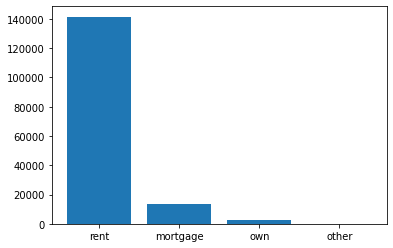

In [ ]:
x=['rent','mortgage','own','other']
y=[141471,13204,2291,136]
plt.bar(x,y)

In [ ]:
print(xtrain['int_rate'].values[:3])

['5.79%' '9.88%' '10.74%']


In [ ]:
def str_parser(x):
    if '%' in str(x):
        return(float(str(x).replace('%','')))
    return x

In [ ]:
xtrain['int_rate']=xtrain['int_rate'].apply(str_parser)
xtrain['revol_util']=xtrain['revol_util'].apply(str_parser)
xtest['int_rate']=xtest['int_rate'].apply(str_parser)
xtest['revol_util']=xtest['revol_util'].apply(str_parser)

In [ ]:
xtrain=xtrain.drop(labels='emp_title',axis=1)
xtest=xtest.drop(labels='emp_title',axis=1)

In [ ]:
emp_length_mode=xtrain['emp_length'].mode()[0]
xtrain['emp_length']=xtrain['emp_length'].fillna(value=emp_length_mode)
xtest['emp_length']=xtest['emp_length'].fillna(value=emp_length_mode)

In [ ]:
xtest['title']=xtest['title'].fillna(value="missing")
xtrain['title']=xtrain['title'].fillna(value="missing")

In [ ]:
from sklearn import preprocessing
grade_encoder=preprocessing.LabelEncoder()
data['grade']=xtrain['grade'].fillna('G')
data['grade'].value_counts()
xtrain['grade']=xtrain['grade'].replace(['A','B','C','D','E','F','G'],[0,1,2,3,4,5,6])
xtest['grade']=xtest['grade'].replace(['A','B','C','D','E','F','G'],[0,1,2,3,4,5,6])
xtrain['grade'].head()

19924    0.0
29619    1.0
17354    1.0
13441    0.0
30877    0.0
Name: grade, dtype: float64

In [ ]:
xtrain['emp_length'].value_counts()
data['emp_length'].value_counts()
g={'< 1 year':0,'1 year':1,'2 years':2,'3 years':3,'4 years':4,'5 years':5,'6 years':6,'7 years':7,'8 years':8,'9 years':9,'10+ years':10}

In [ ]:
xtrain['emp_length']=xtrain['emp_length'].apply(lambda x:g[x])

In [ ]:
xtest['emp_length']=xtest['emp_length'].apply(lambda x:g[x])

In [ ]:
xtrain['title'].unique()

array(['Grandview', 'Physical Therapy Loan', 'Pool Loan', ...,
       'Lanaii Hawaii Dream Vacation For 4',
       'Home Improvement/moving $$$ to accept a better job offer!',
       'home settlement'], dtype=object)

In [ ]:
xtrain['title']=xtrain['title'].apply(str.lower)
xtest['title']=xtest['title'].apply(str.lower)

In [ ]:
lists=['debt consolidation','credit card refinancing','business','vacation','home improvement','majar purchase','medical expense','car financing','moving and relocation','home buying','green loan','consolidation']

In [ ]:
xtrain['term'].value_counts()
xtrain['term'].replace(["36 months","64 months"],[36,64],inplace=True)
xtrain['term'].value_counts()

36           22161
60 months     7615
Name: term, dtype: int64

In [ ]:
data['loan_status'].value_counts()

Fully Paid                                             33586
Charged Off                                             5653
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Current                                                  513
In Grace Period                                           16
Late (31-120 days)                                        12
Late (16-30 days)                                          5
Default                                                    1
Name: loan_status, dtype: int64

In [ ]:
data['term'].value_counts()

36 months    31534
60 months    11001
Name: term, dtype: int64

<BarContainer object of 2 artists>

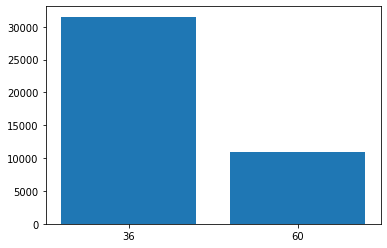

In [ ]:
x=['36','60']
y=[31534,11001]
plt.bar(x,y)

In [ ]:
df=pd.DataFrame(data,columns=["loan_status","term"])
df.head()

,loan_status,term
0,Fully Paid,36 months
1,Charged Off,60 months
2,Fully Paid,36 months
3,Fully Paid,36 months
4,Current,60 months


In [ ]:
group=df["loan_status"].groupby(df["term"])
group

In [ ]:
counts=xtrain.groupby(["loan_status","term"])
a=len(list(counts)[0][1]) #charged off 36 month
a

2294

In [ ]:
b=len(list(counts)[1][1])#charged off 60 month
b

1684

In [ ]:
xtrain["term"].value_counts()
xtrain["term"].head()

19924           36
29619           36
17354    60 months
13441           36
30877           36
Name: term, dtype: object

<BarContainer object of 2 artists>

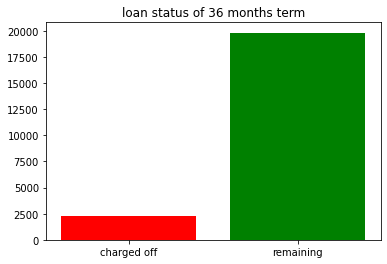

In [ ]:
c=22067-2257
d=7707-1698
z=["charged off","remaining"]
x=[a,c]
y=[b,d]
plt.title("loan status of 36 months term")
plt.bar(z,x,color=["red","green"])

<BarContainer object of 2 artists>

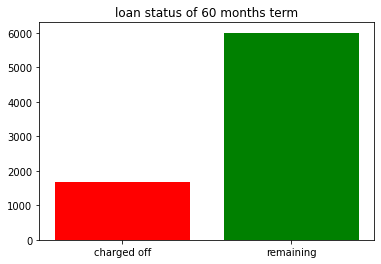

In [ ]:
plt.title("loan status of 60 months term")
plt.bar(z,y,color=["red","green"])

<BarContainer object of 4 artists>

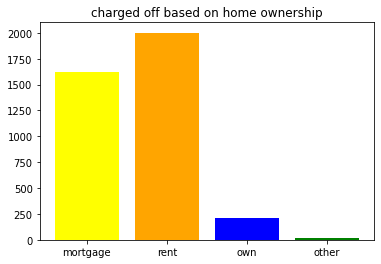

In [ ]:
counts=xtrain.groupby(["loan_status","home_ownership"])
list(counts)
#charged off according to home ownership
x=["mortgage","rent","own","other"]
y=[1624,2001,214,16]
plt.title("charged off based on home ownership")
plt.bar(x,y,color=["yellow","orange","blue","green"])

<BarContainer object of 3 artists>

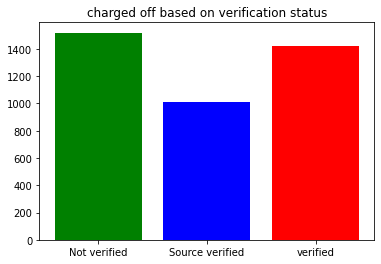

In [ ]:
counts=xtrain.groupby(["loan_status","verification_status"])
list(counts)
x=["Not verified","Source verified","verified"]
y=[1519,1011,1425]
plt.title("charged off based on verification status")
plt.bar(x,y,color=["green","blue","red"])

<BarContainer object of 10 artists>

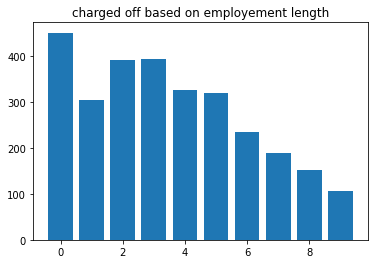

In [ ]:
counts=xtrain.groupby(["loan_status","emp_length"])
list(counts)
x=[0,1,2,3,4,5,6,7,8,9]
y=[450,303,391,392,326,320,235,188,151,106]
plt.title("charged off based on employement length")
plt.bar(x,y)

<BarContainer object of 9 artists>

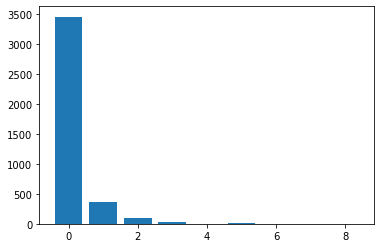

In [ ]:
data['delinq_2yrs'].value_counts()
xtrain['delinq_2yrs']=xtrain['delinq_2yrs'].fillna(0.0)
xtrain['delinq_2yrs'].isnull().sum()
counts=xtrain.groupby(["loan_status","delinq_2yrs"])
list(counts)
x=[0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0]
y=[3461,361,96,24,0,9,2,1,1]
plt.bar(x,y)

In [ ]:
df=pd.DataFrame(data=xtrain,columns=["loan_status","loan_amnt"])
df_prices = df.groupby("loan_status").agg([np.mean, np.std])
prices=df_prices['loan_amnt']
prices.head()

,mean,std
loan_status,,
Charged Off,12176.263198,8157.446209
Current,17633.477011,8938.816204
Does not meet the credit policy. Status:Charged Off,9644.619048,6571.857530
Does not meet the credit policy. Status:Fully Paid,8902.277542,6143.911033
Fully Paid,10927.238377,7250.447153


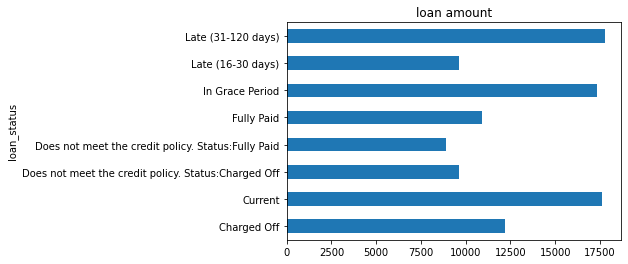

In [ ]:
prices.plot(kind = "barh", y = "mean", legend = False, 
            title = "loan amount")

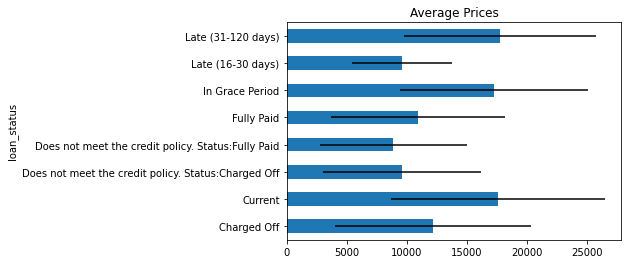

In [ ]:
prices.plot(kind = "barh", y = "mean", legend = False, 
            title = "Average Prices", xerr = "std") 

In [ ]:
xtrain.columns
#xtrain['earliest_cr_line'].head()

Index(['id', 'member_id', 'loan_amnt', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens'],
      dtype='object')

In [ ]:
numerical=['last_fico_range_high', 'last_fico_range_low','fico_range_low', 'fico_range_high',"loan_amnt","int_rate","installment","emp_length","annual_inc","dti","delinq_2yrs","inq_last_6mths","open_acc","pub_rec",'revol_bal', 'revol_util', 'total_acc','acc_now_delinq', 'delinq_amnt', 'pub_rec_bankruptcies',]

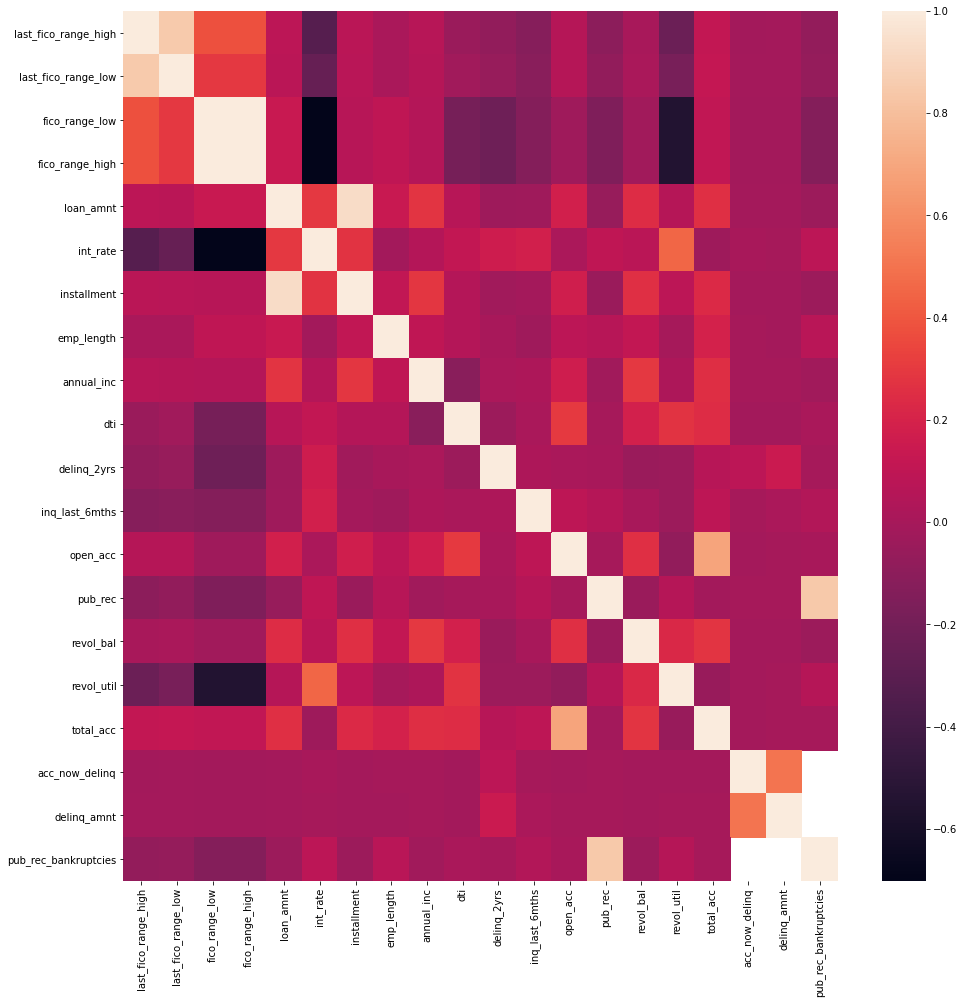

In [ ]:
import seaborn as sns
numerical=numerical
correlation=xtrain[numerical].corr()
fig,ax=plt.subplots(figsize=(16,16))
sns.heatmap(correlation,ax=ax)
plt.show()

In [ ]:
column=["loan_status"]
xtrain=xtrain.drop(labels=column,axis=1)

In [ ]:
b=[]
for i in ytrain:
    if(i=="Charged Off"):
        b.append(1)
    else:
        b.append(0)
xtrain.dtypes
c=xtrain.columns
c
d=["id","member_id","term","sub_grade","verification_status","url","purpose","title"                          
,"zip_code",                       
"addr_state","earliest_cr_line","initial_list_status","application_type"]

xtrain=xtrain.drop(labels=d,axis=1)
xtrain.dtypes

loan_amnt                     float64
int_rate                      float64
installment                   float64
grade                         float64
emp_length                      int64
home_ownership                 object
annual_inc                    float64
dti                           float64
delinq_2yrs                   float64
fico_range_low                float64
fico_range_high               float64
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util                    float64
total_acc                     float64
last_fico_range_high          float64
last_fico_range_low           float64
collections_12_mths_ex_med    float64
acc_now_delinq                float64
chargeoff_within_12_mths      float64
delinq_amnt                   float64
pub_rec_bankruptcies          float64
tax_liens                     float64
dtype: object

In [ ]:
xtrain=xtrain.drop(labels="home_ownership",axis=1)

In [ ]:
from sklearn.impute   import SimpleImputer
xtrain['row_missingness'] = xtrain.isnull().sum(axis=1)
mean_impute  = SimpleImputer(strategy='mean')
imputed_data = mean_impute.fit_transform(xtrain)
imputed_data = pd.DataFrame(imputed_data, columns = xtrain.columns)

In [ ]:
column=["loan_status"]
xtest=xtest.drop(labels=column,axis=1)
d=["id","member_id","term","sub_grade","verification_status","url","purpose","title"                          
,"zip_code",                       
"addr_state","earliest_cr_line","initial_list_status","application_type","home_ownership"]

xtest=xtest.drop(labels=d,axis=1)
xtrain.dtypes

loan_amnt                     float64
int_rate                      float64
installment                   float64
grade                         float64
emp_length                      int64
annual_inc                    float64
dti                           float64
delinq_2yrs                   float64
fico_range_low                float64
fico_range_high               float64
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util                    float64
total_acc                     float64
last_fico_range_high          float64
last_fico_range_low           float64
collections_12_mths_ex_med    float64
acc_now_delinq                float64
chargeoff_within_12_mths      float64
delinq_amnt                   float64
pub_rec_bankruptcies          float64
tax_liens                     float64
row_missingness                 int64
dtype: object

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(imputed_data,b)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.impute   import SimpleImputer
xtest['row_missingness'] = xtest.isnull().sum(axis=1)
mean_impute  = SimpleImputer(strategy='mean')
imputed_data2 = mean_impute.fit_transform(xtest)
imputed_data2 = pd.DataFrame(imputed_data2, columns = xtest.columns)

In [ ]:
a=lr.predict(imputed_data2)
one=0
zer=0
for i in a:
    if i==1:
        one+=1
    else:
        zer+=1
print(one)
print(zer)

843
11920


In [ ]:
from sklearn.ensemble import RandomForestClassifier 
rf_model = RandomForestClassifier (n_estimators=100,bootstrap = True, max_features = 'sqrt')
rf_model.fit(imputed_data,b)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf_predictions = rf_model.predict(imputed_data2) 
rf_probs = rf_model.predict_proba(imputed_data2)[:,1]
b1=[]
for i in ytest:
    if (i=='Charged off'):
        b1.append(1)
    else:
        b1.append(0)


In [ ]:
from sklearn.metrics import roc_auc_score
#Calculate roc auc
#roc_value = roc_auc_score(b1, rf_probs)
try:
     roc_auc_score(b1, rf_probs)
except ValueError:
    pass


In [ ]:
lrpredict=lr.predict(imputed_data2)
from sklearn.metrics import classification_report 
# Accuracy Of Logistic regression
print(classification_report(b1, lrpredict))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97     12763
           1       0.00      0.00      0.00         0

    accuracy                           0.93     12763
   macro avg       0.50      0.47      0.48     12763
weighted avg       1.00      0.93      0.97     12763



In [ ]:
plt.plot(b1,lrpredict)

In [ ]:
from sklearn.metrics import roc_curve 
lr_pred_prob=lr.predict_proba(imputed_data2)[:,1]
fpr, tpr, Thresholds=roc_curve(b1, lr_pred_prob) 
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr, tpr, Label="Logistic Regression")
plt.xlabel("False positive rate") 
plt.ylabel("True positive rate")
plt.title("Logistiv Regressive ROC curve")

In [ ]:
# Accuracy Of Random Forest
print(classification_report(b1,rf_predictions))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     12763
           1       0.00      0.00      0.00         0

    accuracy                           0.92     12763
   macro avg       0.50      0.46      0.48     12763
weighted avg       1.00      0.92      0.96     12763



In [ ]:
fpr1, tpr1,Thresholds =roc_curve(b1,rf_probs)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr1, tpr1,Label="RandomForest")
plt.xlabel("False positive rate")
plt.ylabel("True positive mate")
plt.title("RandomForest ROC curve")

In [ ]:
print(rf_predictions,b1)

In [ ]:
plt.plot(rf_predictions,b1)